Load Packages

In [172]:
# Multiple Linear Regression
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# import the metrics class
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve,auc
print("packages loaded")

packages loaded


Load Data

In [173]:
# path='D:\\Class\\Algorithms\\Classification\\Logistic_Regression\\'
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
print("loaded Data")

loaded Data


Univariate Analysis

In [174]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000,0
1,15810944,Male,19.0,20000,0
2,15668575,Female,26.0,43000,0
3,15603246,Female,20.0,57000,0
4,15804002,Male,19.0,76000,0


In [175]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,5.920000e+02,590.000000,592.000000,592.000000
mean,1.568790e+07,41.477966,47771.959459,0.565878
std,7.281365e+04,10.922105,42334.863100,0.496060
min,1.556669e+07,18.000000,2000.000000,0.000000
25%,1.562676e+07,35.000000,2000.000000,0.000000
50%,1.568556e+07,42.000000,44000.000000,1.000000
75%,1.575036e+07,48.000000,79000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [176]:
dataset.boxplot()

<AxesSubplot:>

In [177]:
#Renaming columns
print(dataset.columns)

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [178]:
dataset.columns = ['user_id', 'gender',  'age', 'estimated_salary', 'purchased']
# dataset.columns = ['user_id', 'gender', 'gender_encode', 'age', 'estimated_salary', 'purchased', 'test_purchase']

In [179]:
dataset.purchased.value_counts() / dataset.shape[0]

1    0.565878
0    0.434122
Name: purchased, dtype: float64

In [180]:
dataset.gender.value_counts() / dataset.shape[0]

Male      0.657095
Female    0.342905
Name: gender, dtype: float64

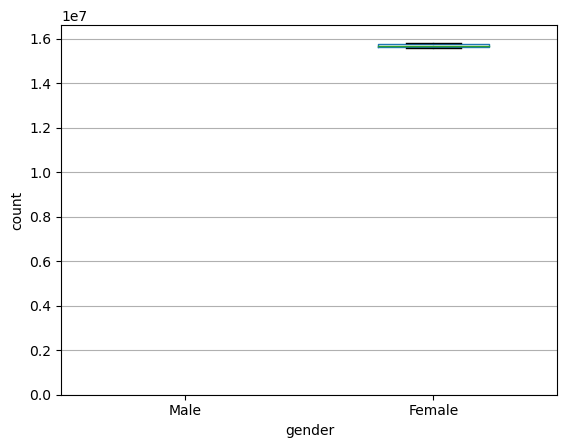

In [181]:
ax = sns.countplot(x='gender', data=dataset)
ax.set_xlabel('gender')
ax.set_ylabel("count")  
plt.show()


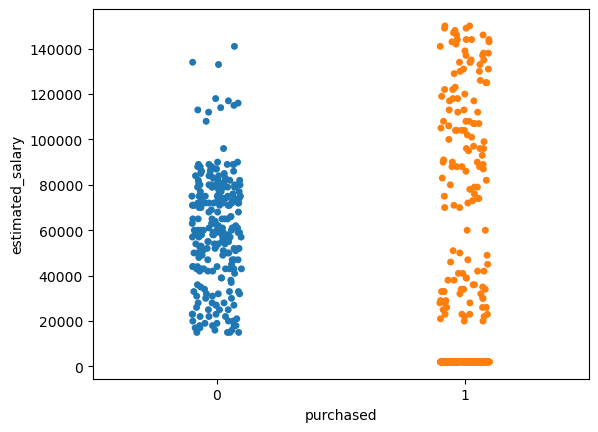

In [182]:
sns.stripplot(x="purchased", y="estimated_salary",  data=dataset) 
plt.show()


In [183]:
dataset.purchased.value_counts() / len(dataset)  * 100

1    56.587838
0    43.412162
Name: purchased, dtype: float64

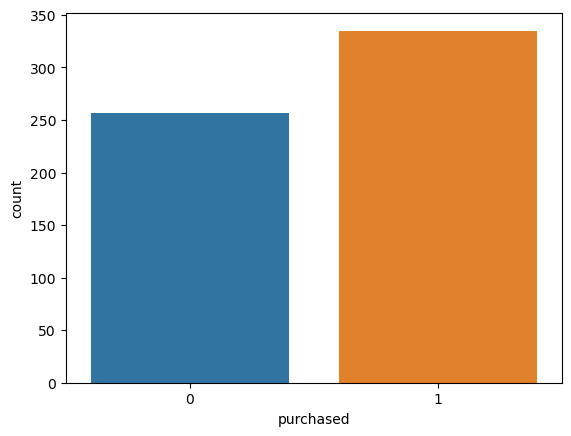

In [184]:
ax = sns.countplot(x='purchased', data=dataset)
ax.set_xlabel('purchased')
ax.set_ylabel("count")  
plt.show()


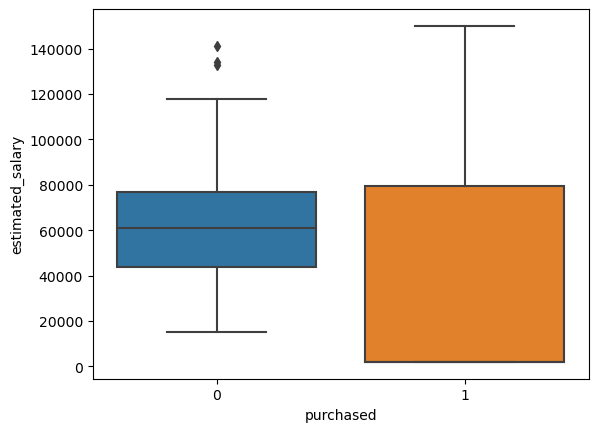

In [185]:
ax = sns.boxplot( x="purchased", y="estimated_salary", data=dataset)
plt.show()


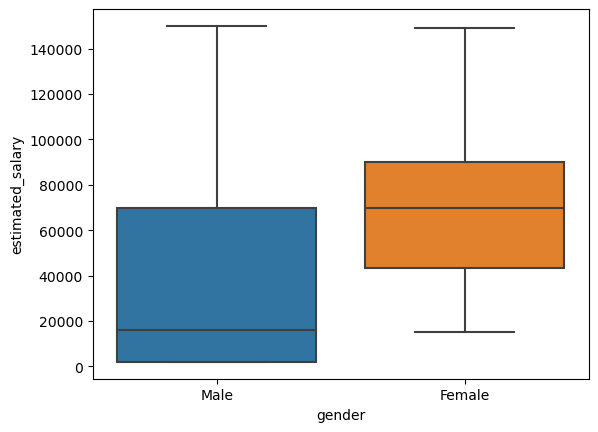

In [186]:

ax = sns.boxplot(x="gender", y="estimated_salary", data=dataset)
plt.show()


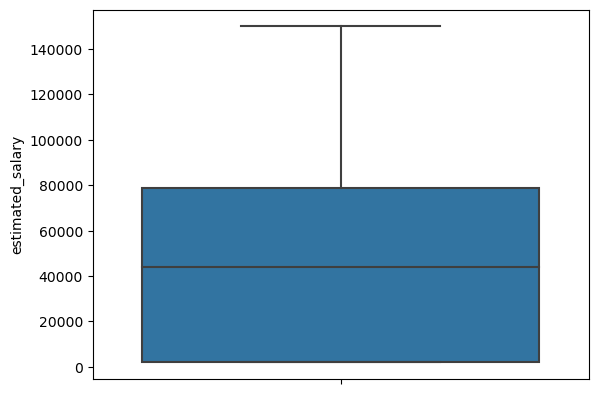

In [187]:
ax = sns.boxplot(y="estimated_salary", data=dataset)
plt.show()


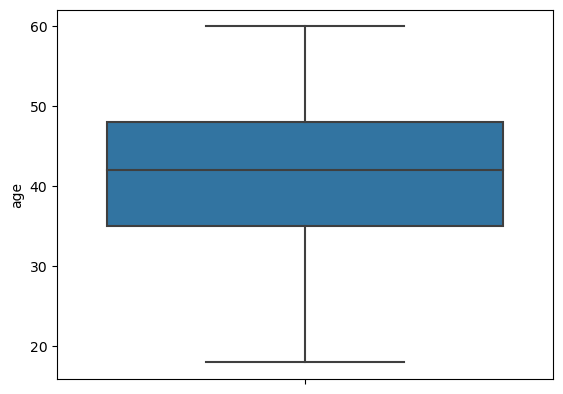

In [188]:
ax = sns.boxplot(y="age", data=dataset)
plt.show()


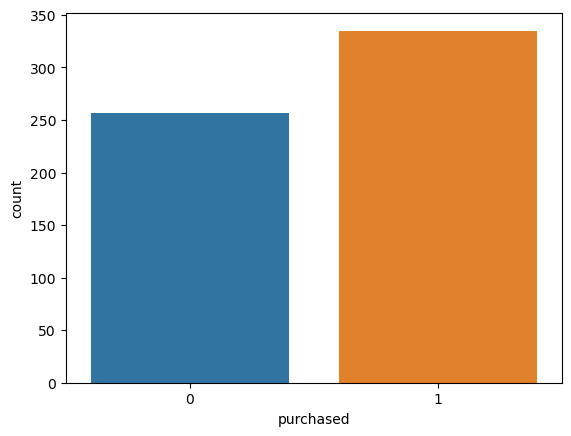

In [189]:
ax = sns.countplot(x='purchased', data=dataset)
ax.set_xlabel('purchased')
ax.set_ylabel("count") 
plt.show()


# Bivariate Analysis

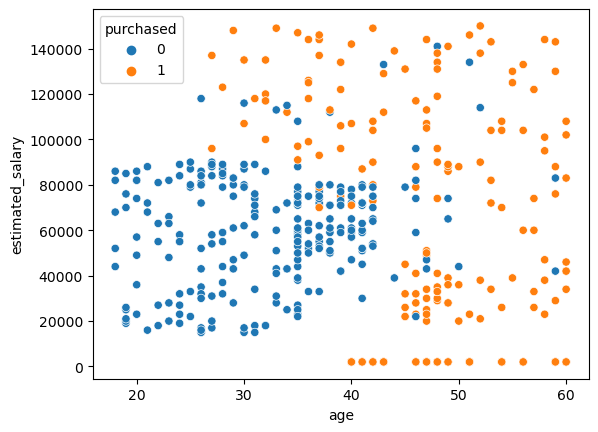

In [190]:
ax = sns.scatterplot(x="age", y="estimated_salary", hue='purchased', data=dataset)
plt.show()


In [191]:
# ax = sns.scatterplot(x="age", y="estimated_salary", hue='test_purchase', data=dataset)

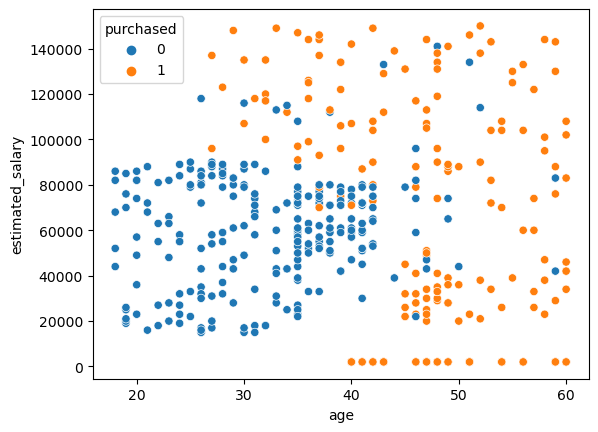

In [192]:
ax = sns.scatterplot(x="age", y="estimated_salary", hue='purchased', data=dataset)
plt.show()


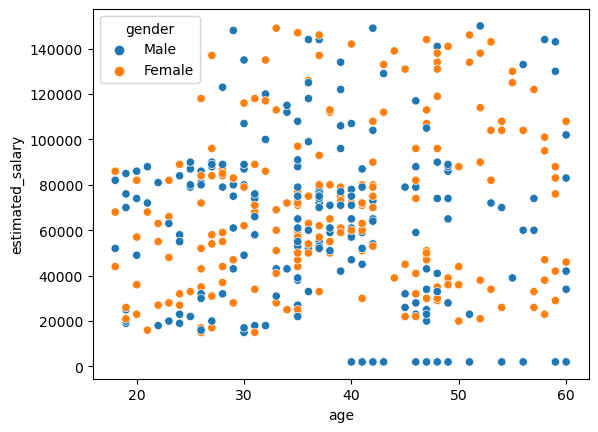

In [193]:
ax = sns.scatterplot(x="age", y="estimated_salary", hue='gender', data=dataset)
plt.show()


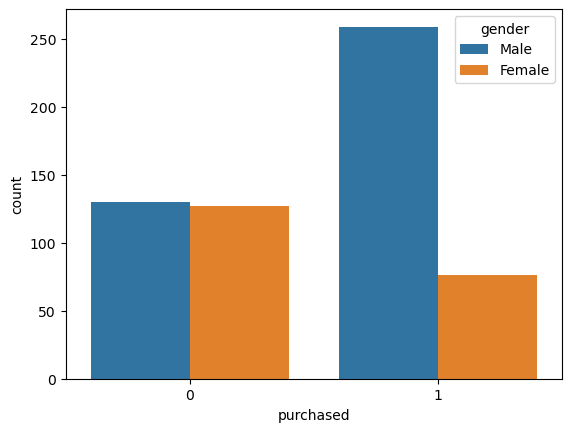

In [194]:
ax = sns.countplot(x="purchased", hue='gender', data=dataset)
plt.show()


# Correlation

In [195]:
dataset.corr()

,user_id,age,estimated_salary,purchased
user_id,1.000000,0.082144,0.092164,-0.039228
age,0.082144,1.000000,-0.294394,0.702080
estimated_salary,0.092164,-0.294394,1.000000,-0.264484
purchased,-0.039228,0.702080,-0.264484,1.000000


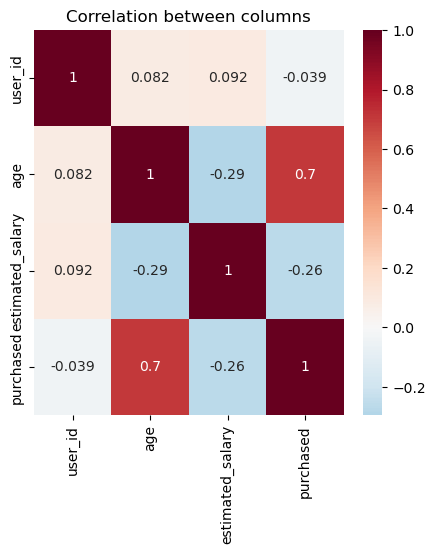

In [196]:

plt.figure(figsize=(5,5))
sns.heatmap(dataset.corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('Correlation between columns')
plt.show()

# Missing Value Treatement

In [197]:
##################Missing Value Treatement#############

#1. Deletion
# count the number of NaN values in each column


# drop rows with missing values
dataset.dropna(inplace=True)
# summarize the number of rows and columns in the dataset
print(dataset.shape)
print(dataset.isnull().sum())

(590, 5)
user_id             0
gender              0
age                 0
estimated_salary    0
purchased           0
dtype: int64


In [198]:
# fill missing values with mean column values
# drop rows with missing values
# dataset.dropna(inplace=True)

In [199]:
mode = dataset['gender'].mode().value_counts().index[0]
mode
# # dataset['gender'] = dataset['gender'].astype("category")
# print(mode)
# # print(type(mode))
dataset['gender'].fillna(mode,inplace=True)

In [200]:
#2. Impute
# fill missing values with mean column values
dataset.fillna(dataset.mean(), inplace=True)
# count the number of NaN values in each column
print(dataset.isnull().sum())

user_id             0
gender              0
age                 0
estimated_salary    0
purchased           0
dtype: int64


C:\Users\praba\AppData\Local\Temp\ipykernel_48292\97648480.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace=True)


# Outlier Detection

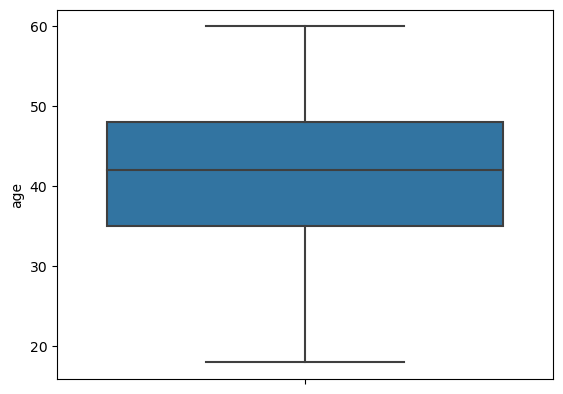

In [201]:
#################Outlier Detection ####################
ax = sns.boxplot( y="age", data=dataset)
plt.show()


NO  Outliers

# Feature Transformations

In [202]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
dataset['gender_en'] = labelencoder.fit_transform(dataset['gender'])
# #One hot Encoding
# ohe = pd.get_dummies(dataset['gender'], prefix='gender', drop_first=False)
# ohe.columns
# dataset= pd.concat([dataset, ohe], axis=1)
# print(dataset.head())
dataset.head()

,user_id,gender,age,estimated_salary,purchased,gender_en
0,15624510,Male,19.0,19000,0,1
1,15810944,Male,19.0,20000,0,1
2,15668575,Female,26.0,43000,0,0
3,15603246,Female,20.0,57000,0,0
4,15804002,Male,19.0,76000,0,1


In [203]:
# dataset['gender_0'] = dataset['gender_0'].astype(object)
# dataset['gender_1'] = dataset['gender_1'].astype(object)
# dataset.dtypes

# Set Features \ target

In [204]:
features = [ 'age',  'estimated_salary', 'gender_en']
target = ['purchased']
X = dataset[features]
y = dataset[target]
print ("features set")

features set


# Train split data

In [205]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("train test split done")

train test split done


# Model Building


In [206]:
import statsmodels.api as sm
 
model = sm.Logit(y_train, X_train)
 
result = model.fit()

result.summary2()

Optimization terminated successfully.
         Current function value: 0.566037
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.176     
Dependent Variable: purchased        AIC:              540.3392  
Date:               2023-01-17 00:17 BIC:              552.8101  
No. Observations:   472              Log-Likelihood:   -267.17   
Df Model:           2                LL-Null:          -324.30   
Df Residuals:       469              LLR p-value:      1.5511e-25
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
age                0.0420   0.0056  7.4926 0.0000  0.0310  0.0530
estimated_salary  -0.0000   0.0000 -8.2687 0.0000 -0.0000 -0.0000
gender_en         -0.3289   0.2213 -1.4859 0.1373 -0.7626  0.1049
=================================================================

"""

In [207]:
# y_pred = result.predict(X_test)
# threshold = .4
# import numpy as np
# y_pred = np.array(y_pred > threshold, dtype=int)
# y_pred

In [208]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
classifier

C:\Users\praba\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [209]:
classifier

LogisticRegression()

In [210]:
y_pred_lr = classifier.predict(X_test)

In [211]:
# classifier.predict_proba(X_test)

In [212]:
y_pred_lr

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

# Metrics

In [213]:
from sklearn.metrics import ConfusionMatrixDisplay
# Making the Confusion Matrix
def get_metrics(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)

    class_names=[0,1] # name  of classes
    cm = confusion_matrix(y_test, y_pred, labels=class_names)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=class_names)
    disp.plot()

    plt.show()

#     print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#     # Model Precision: what percentage of positive tuples are labeled as such?
# #     print("Precision:",metrics.precision_score(y_test, y_pred))

#     # Model Recall: what percentage of positive tuples are labelled as such?
#     print(" True positive rate or (Recall or Sensitivity) :",metrics.recall_score(y_test, y_pred))

#     tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
#     specificity = tn / (tn+fp)

#     #Specitivity. or True negative rate
#     print(" True Negative rate or Specitivity :",specificity)

#     false_negative = fn / (fn+tp)

#     #False negative rate
#     print(" False Negative rate :",false_negative)

#     #False positive rate
#     print(" False positive rate (Type 1 error) :",1 - specificity)
#     print(cm)


def get_auc_score(y_test ,y_pred):
    r_a_score = roc_auc_score(y_test,y_pred)
    print("ROC-AUC-Score:", r_a_score)
    
def plot_roc_curve(y_test,y_pred,label=None):

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
def get_accuracy_error(y_test,y_pred,label):
    print(label + " Accuracy:",metrics.accuracy_score(y_test, y_pred))
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
#     print(label + " Error:", (fp+fn)/(tn+ fp+ fn+ tp) ) 

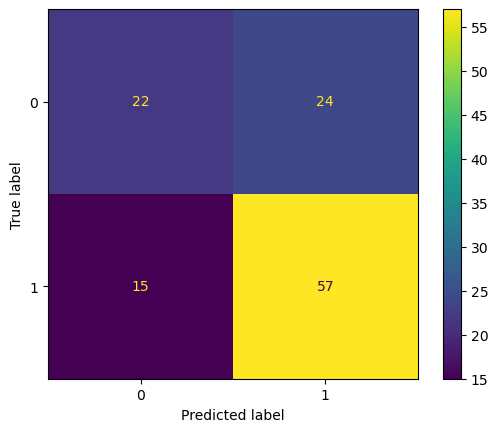

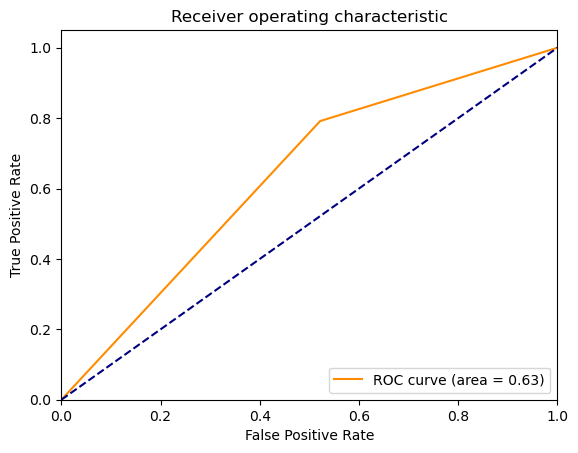

In [214]:
get_metrics(y_test, y_pred_lr)
plot_roc_curve(y_test, y_pred_lr)

In [215]:
print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.59      0.48      0.53        46
           1       0.70      0.79      0.75        72

    accuracy                           0.67       118
   macro avg       0.65      0.63      0.64       118
weighted avg       0.66      0.67      0.66       118



In [216]:

# print('**********************')
# print("Logistic Regression Feature Importance")
# print('**********************')
# feature_importance = abs(classifier.coef_[0])
# feature_importance = 100.0 * (feature_importance / feature_importance.max())
# sorted_idx = np.argsort(feature_importance)
# pos = np.arange(sorted_idx.shape[0]) + .5

# featfig = plt.figure()
# featax = featfig.add_subplot(1, 1, 1)
# featax.barh(pos, feature_importance[sorted_idx], align='center')
# featax.set_yticks(pos)
# featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
# featax.set_xlabel('Relative Feature Importance')

# plt.tight_layout()   
# plt.show()


In [217]:
# plot_roc_curve(y_test,y_pred)
# get_auc_score(y_test ,y_pred)

# Decision Tree


In [218]:
from sklearn.tree import DecisionTreeClassifier

# import pydotplus
# import pydot

In [219]:
# # Create decision tree classifer object
clf = DecisionTreeClassifier(random_state=0, max_depth=3, min_samples_split = 40, min_samples_leaf = 40, criterion='entropy')

# # Train model
clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=40,
                       min_samples_split=40, random_state=0)

In [220]:
#!pip install dtreeplt

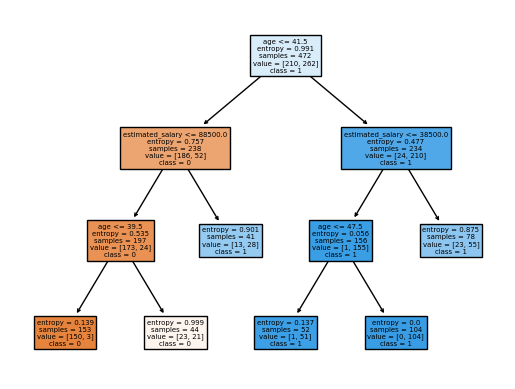

In [221]:
from sklearn.datasets import load_iris
from sklearn import tree
tree.plot_tree(clf, feature_names=features,  
                   class_names=['0','1'],filled=True)
plt.show()

In [222]:
# Predicting the Test set results
y_pred_tree = clf.predict(X_test)
# y_train_pred_tree = clf.predict(X_train)


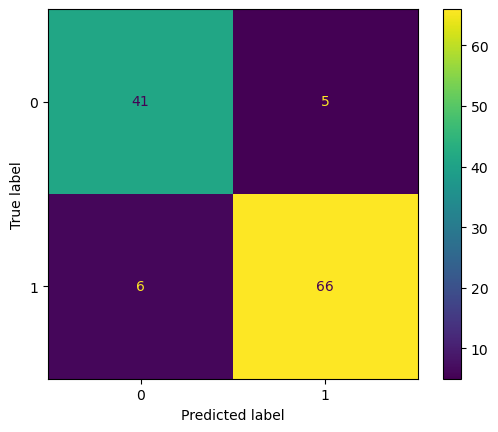

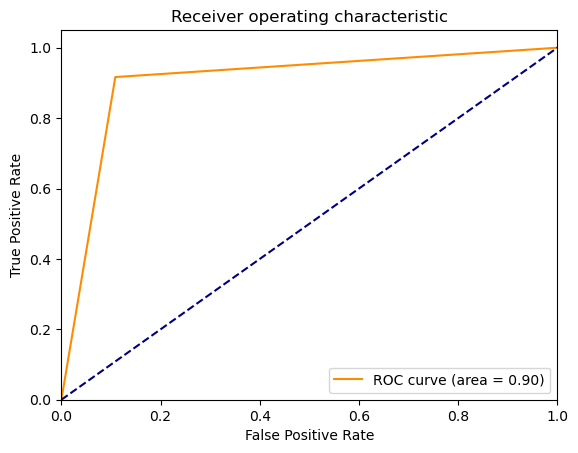

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        46
           1       0.93      0.92      0.92        72

    accuracy                           0.91       118
   macro avg       0.90      0.90      0.90       118
weighted avg       0.91      0.91      0.91       118



In [223]:
y_pred_tree = clf.predict(X_test)
get_metrics(y_test, y_pred_tree)
plot_roc_curve(y_test,y_pred_tree)

# get_accuracy_error(y_train, y_train_pred_tree, 'Train')

# get_accuracy_error(y_test, y_pred_tree, 'Test')

print(metrics.classification_report(y_test, y_pred_tree))

In [224]:
# get_auc_score(y_test ,y_pred)

# Random Forest

In [225]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=3,    
                            min_samples_leaf=10, min_samples_split=20,
                            random_state=10)
print(rf)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

y_train_pred_rf = rf.predict(X_train)



RandomForestClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=20,
                       random_state=10)


C:\Users\praba\AppData\Local\Temp\ipykernel_48292\3317155280.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


In [226]:
# rf.estimators_

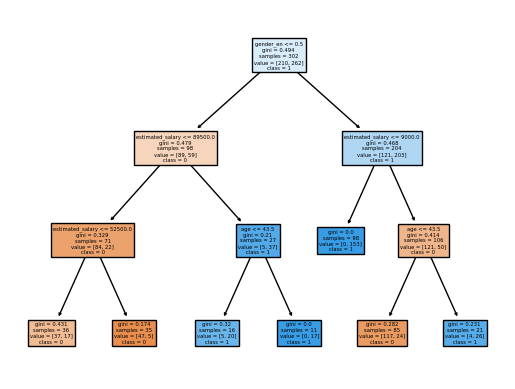

In [227]:
# Creating decision tree plot
estimator = rf.estimators_[99]

tree.plot_tree(estimator, feature_names=features,  
                   class_names=['0','1'],filled=True)
plt.show()

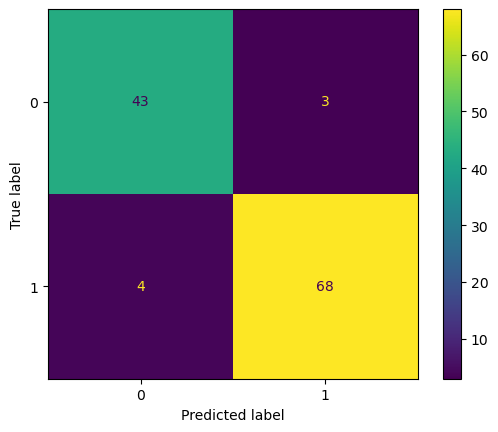

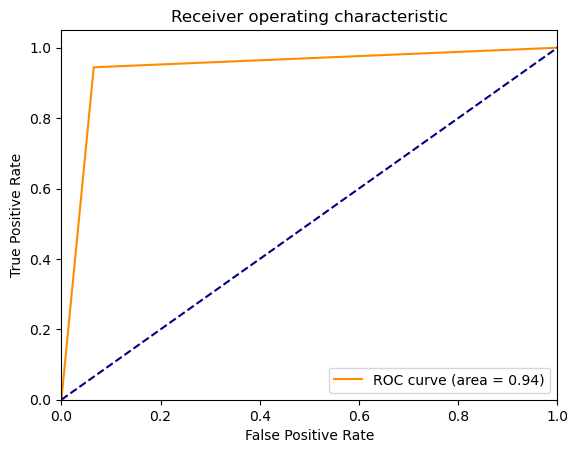

In [228]:

get_metrics(y_test,y_pred_rf)
plot_roc_curve(y_test,y_pred_rf)
# get_accuracy_error(y_train, y_train_pred_rf, 'Train')

# get_accuracy_error(y_test, y_pred_rf, 'Test')

In [229]:
print(metrics.classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        46
           1       0.96      0.94      0.95        72

    accuracy                           0.94       118
   macro avg       0.94      0.94      0.94       118
weighted avg       0.94      0.94      0.94       118



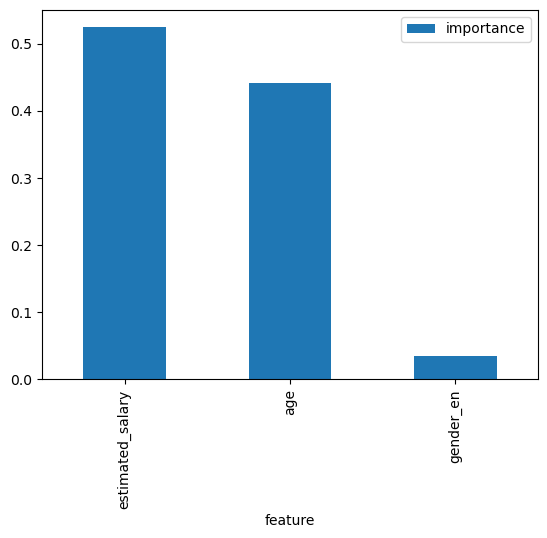

In [230]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)
importances.plot.bar()
plt.show()

# Saving  and Loading ML Model

In [231]:

# save the model to disk
import pickle
filename = 'rf_model.h5'
pickle.dump(clf, open(filename, 'wb'))



# # some time later...
 
# # load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model
loaded_model.predict(X_test)
result = loaded_model.score(X_test, y_test)
print(result)

0.9067796610169492


In [232]:
loaded_model

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=40,
                       min_samples_split=40, random_state=0)

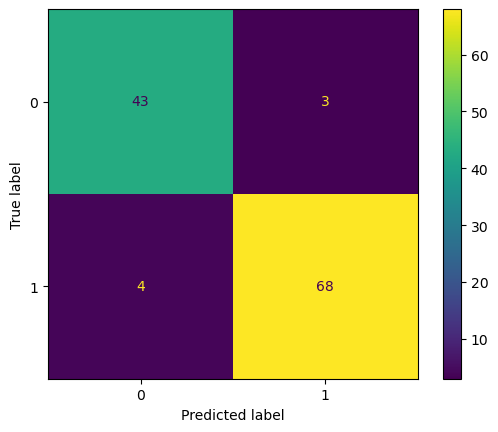

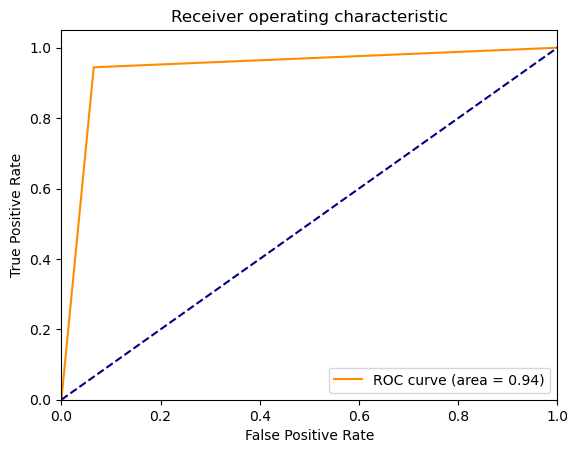

In [233]:
y_train_pred_rf = loaded_model.predict(X_train)

get_metrics(y_test,y_pred_rf)
plot_roc_curve(y_test,y_pred_rf)

# Predicting 

In [234]:
 temp = X_test.head(1)


In [235]:

temp.age = 30
temp.estimated_salary = 1500000
temp.gender_en = 1
temp

C:\Users\praba\AppData\Local\Temp\ipykernel_48292\3499257597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.age = 30
C:\Users\praba\AppData\Local\Temp\ipykernel_48292\3499257597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.estimated_salary = 1500000
C:\Users\praba\AppData\Local\Temp\ipykernel_48292\3499257597.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,age,estimated_salary,gender_en
227,30,1500000,1


In [236]:
loaded_model.predict(temp)

array([1], dtype=int64)

In [237]:
# get_auc_score(y_test ,y_pred)

# SVM

In [238]:
from sklearn import svm
print('**********************')
print("SVM")
print('**********************')

svc_classfier = svm.SVC(kernel ='rbf', C= 1, gamma=1)

svc_classfier.fit(X_train, y_train)

y_pred_svm = svc_classfier.predict(X_test)
svc_classfier

**********************
SVM
**********************


C:\Users\praba\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, gamma=1)

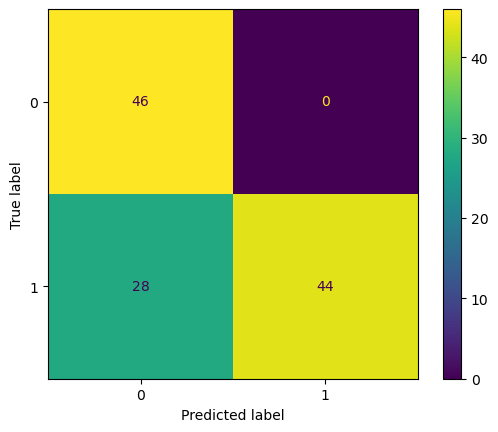

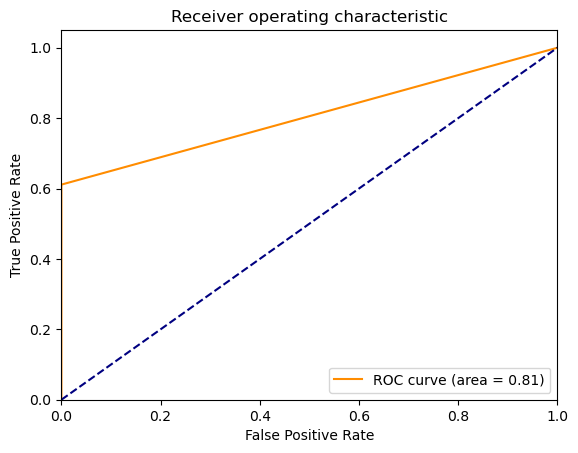

ROC-AUC-Score: 0.8055555555555556


In [239]:
get_metrics(y_test,y_pred_svm)
plot_roc_curve(y_test,y_pred_svm)
get_auc_score(y_test ,y_pred_svm)

In [240]:

X_train.shape[1]

3

Neural Netowrk

In [ ]:
# !pip install keras
!pip install tensorflow

In [243]:
import keras as keras
from keras.models import Sequential
from  keras.layers  import Dense
# from keras.layers import Convolution2D
# from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Activation
from keras.layers.advanced_activations import LeakyReLU

#1 Layers
model = Sequential()
model.add(Dense(5, input_dim=X_train.shape[1]))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

#2 Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#3 Fit
history = model.fit(X_train, y_train, batch_size=10, epochs=5)
y_pred_ann = model.predict(X_test)

get_metrics(y_test,y_pred_ann)
plot_roc_curve(y_test,y_pred_ann)
get_auc_score(y_test ,y_pred_ann)

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
y_pred_ann